In [1]:
# NumPy is used Array operations
import numpy as np

# Pandas is used for data manipulation
import pandas as pd

# Time is used for timing
import time

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Import sklearn metri
from sklearn.metrics import mean_squared_error

# Import sklearn metri
from sklearn.metrics import r2_score

# Import math function square roo
from math import sqrt


In [2]:
# Read in data and display first 5 rows
train_features = pd.read_csv('LC50_training_set-2d.csv')
train_features.head()

,CAS,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
0,50-06-6,2.681,12.466255,8.108226,7.179531,6.324463,5.658249,3.539143,2.311211,1.175338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50-29-3,7.271,14.043606,8.876029,8.931713,6.136763,5.089073,4.087474,2.317743,1.951649,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,50-31-7,4.424,9.300965,5.536581,5.212402,4.008907,3.142882,1.836064,0.771486,0.359117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51-28-5,4.224,10.008072,6.019745,5.702305,4.097730,2.925518,2.080580,1.458563,0.481853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51-79-6,1.231,4.991564,2.770056,2.182522,0.866025,0.577350,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print('The shape of our training features is:', train_features.shape)

The shape of our training features is: (659, 799)


In [4]:
# Descriptive statistics for each column
train_features.describe()

,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,xp8,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,...,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.0,659.000000,659.0,659.0
mean,4.042343,8.742180,5.433205,4.773294,3.468306,2.489409,1.726752,0.998588,0.540885,0.291144,...,0.039454,0.007587,0.015175,0.001517,0.022762,0.003035,0.0,0.001517,0.0,0.0
std,1.495679,3.740289,2.460079,2.436830,2.231557,1.913057,1.563486,1.100576,0.756904,0.496943,...,0.216964,0.102862,0.122339,0.038954,0.159113,0.077909,0.0,0.038954,0.0,0.0
min,0.037000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,3.105000,5.983128,3.787694,3.121320,1.917941,1.143038,0.624755,0.204124,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,3.936000,8.198671,5.036581,4.405484,3.240600,2.259872,1.462749,0.702221,0.297004,0.078567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
75%,4.920000,10.673362,6.765568,5.980641,4.520981,3.476458,2.457642,1.437655,0.815482,0.402862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
max,9.261000,25.914214,15.867412,16.258883,15.000000,13.750000,11.812500,9.125000,6.140625,4.621147,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.0,1.000000,0.0,0.0


In [5]:
# Read in data and display first 5 rows
test_features = pd.read_csv('LC50_prediction_set-2d.csv')
test_features.head(5)

,CAS,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
0,67-68-5,0.361,3.577350,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68-12-2,0.841,4.284457,2.270056,1.802095,0.816497,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72-20-8,8.755,13.533016,8.775728,9.946124,10.329179,8.918763,7.420023,5.761984,4.070863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78-92-2,1.305,4.284457,2.270056,1.802095,0.816497,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78-96-6,1.474,4.284457,2.270056,1.802095,0.816497,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print('The shape of our test features is:', test_features.shape)

The shape of our test features is: (164, 799)


In [7]:
# Descriptive statistics for each column
test_features.describe()

,Tox,x0,x1,x2,xp3,xp4,xp5,xp6,xp7,xp8,...,P=S,-CF3 [aliphatic attach],-CF3 [aromatic attach],-CCl3 [aromatic attach],-CCl3 [aliphatic attach],Halogen [Nitrogen attach],As(=O),-N=C=S,Sn=O,-N=S=O
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.0,164.000000,164.0,164.0,164.0,164.0,164.0,164.0,164.0
mean,4.090494,8.867776,5.555076,4.757517,3.540949,2.498563,1.759728,1.015362,0.552634,0.310682,...,0.054878,0.0,0.018293,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.470065,3.844596,2.579393,2.610741,2.253875,1.966466,1.594323,1.117060,0.797188,0.549801,...,0.253879,0.0,0.174179,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.361000,3.414214,1.732051,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.199250,5.983128,3.787694,2.912284,1.914214,1.094044,0.594544,0.197287,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.097500,8.186016,5.009790,4.219603,3.018726,2.011673,1.373773,0.703555,0.239277,0.050245,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.952000,10.296883,6.507612,5.868034,4.626763,3.443778,2.411727,1.437948,0.726872,0.410197,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,8.755000,25.692024,16.316430,16.873015,11.551211,8.918763,7.465309,5.761984,4.070863,2.822508,...,2.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Labels are the values we want to predict
train_labels = np.array(train_features['Tox'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features = train_features.drop('CAS', axis = 1)
train_features = train_features.drop('Tox', axis = 1)
# Saving feature names for later use
train_features_list = list(train_features.columns)

In [9]:
# Convert to numpy array
train_features = np.array(train_features)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)

Training Features Shape: (659, 797)
Training Labels Shape: (659,)


In [10]:
# Labels are the values we want to predict
test_labels = np.array(test_features['Tox'])
# Remove the labels from the features
# axis 1 refers to the columns
test_features = test_features.drop('CAS', axis = 1)
test_features = test_features.drop('Tox', axis = 1)
# Saving feature names for later use
test_features_list = list(test_features.columns)

In [11]:
# Convert to numpy array
test_features = np.array(test_features)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Testing Features Shape: (164, 797)
Testing Labels Shape: (164,)


In [12]:
t1 = time.time()
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs = 32)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs = 36, max_features = 0.5)
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs = 36, oob_score = True)
# Train the model on training data
rf.fit(train_features, train_labels);
t2 = time.time()
print('Time lapse = ',t2-t1)

Time lapse =  17.192667961120605


In [13]:
print('params = ',rf.get_params(True))

params =  {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': 32, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [14]:
# Use the forest's predict method on the train data
train_predictions = rf.predict(train_features)
r2 = r2_score(train_labels, train_predictions)
print('Rsq for Training Data = ',r2,', Score = ', rf.score(train_features, train_labels))
meanSquaredError=mean_squared_error(train_labels, train_predictions)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

Rsq for Training Data =  0.9535657551446944 , Score =  0.9535657551446945
RMSE: 0.3220534582472987


In [15]:
#def printImportantFeatures(names, importance)
#print(rf.feature_importances_) 

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'toxicity.')

Mean Absolute Error: 0.55 toxicity.


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.14 %.


In [18]:
# Use the forest's predict method on the train data
r2 = r2_score(test_labels, predictions)
print('Rsq for Test Data = ',r2,', Score = ', rf.score(test_features, test_labels))
meanSquaredError=mean_squared_error(test_labels, predictions)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

Rsq for Test Data =  0.7300014166724316 , Score =  0.7300014166724316
RMSE: 0.761533981810177


In [19]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

fcnt = 0
for i in range(len(importances)):
    thisimp = importances[indices[i]]
    if thisimp > 1.0e-2:
        fcnt += 1

In [20]:
# Print the feature ranking
print("Feature ranking:\n")

train_features_list2 = train_features_list[0:fcnt]
importances2 = importances[0:fcnt]
std2 = std[0:fcnt]
invsqrt = 1.0/sqrt(len(rf.estimators_))
for i in range(len(train_features_list2)):
    train_features_list2[i] = train_features_list[indices[i]]
    importances2[i] = importances[indices[i]]
    std2[i] = std[indices[i]] * invsqrt  # standard error of the mean importance
    print("%d) %s \t= %f" % (i,train_features_list2[i],importances2[i]))

Feature ranking:

0) ALOGP 	= 0.207310
1) ALOGP2 	= 0.161615
2) BEHm2 	= 0.047223
3) XLOGP 	= 0.045426
4) Mp 	= 0.030886
5) XLOGP2 	= 0.028158
6) Mv 	= 0.027871
7) ATS3p 	= 0.015995
8) BEHm3 	= 0.014687
9) BEHm5 	= 0.012370
10) ATS4m 	= 0.010703


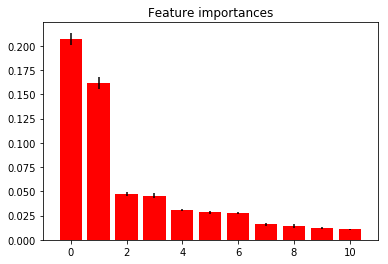

In [22]:
# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(train_features_list2)), importances2, color="r",
             yerr=std2, align="center")
#plt.xticks(range(len(train_features_list2())))
plt.xticks()
plt.xlim([-1,len(train_features_list2)])
plt.show()